In [3]:
####################################################
#### Time Stamp Prediction              ############
#### Auther : asiriamal                 ############
#### Date : 22/01/2020                  ############
####################################################

# Time Stamp Prediction

Files Used : data.csv as data and labels.csv as labels

# Data preprocessing

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import datetime as dt
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from confusion_matrix_pretty_print import plot_confusion_matrix_from_data

In [5]:
data = pd.read_csv("data.csv", sep=';')

In [6]:
data.head()

,TimeStamp,FrameCounter,State,RPM,ObjectDistance,SignalQuality,MovementSlow,MovementFast
0,2017-11-22T23:45:00.859+01:00,32734,1,0.0,0.989470,4,14.2693,0.055457
1,2017-11-22T23:45:01.855+01:00,32751,1,0.0,0.987036,4,12.2064,0.088731
2,2017-11-22T23:45:02.852+01:00,32768,1,0.0,1.008620,7,10.8458,1.696980
3,2017-11-22T23:45:03.848+01:00,32785,2,0.0,0.976657,0,11.2901,2.628660
4,2017-11-22T23:45:04.845+01:00,32802,1,0.0,0.958549,0,13.4203,3.826530


In [7]:
data.tail()

,TimeStamp,FrameCounter,State,RPM,ObjectDistance,SignalQuality,MovementSlow,MovementFast
24700,2017-11-23T06:35:25.513+01:00,452634,0,16.5326,0.711621,10,29.1574,0.587844
24701,2017-11-23T06:35:26.509+01:00,452651,0,16.1115,0.713980,10,29.3478,0.754215
24702,2017-11-23T06:35:27.508+01:00,452668,0,15.9265,0.718161,10,29.7009,1.685890
24703,2017-11-23T06:35:28.503+01:00,452685,0,15.5886,0.722880,10,30.6569,1.818990
24704,2017-11-23T06:35:29.500+01:00,452702,0,15.5886,0.722880,10,32.6087,1.885540


### There is no missing values in the dataset

In [8]:
data.isnull().sum()

TimeStamp         0
FrameCounter      0
State             0
RPM               0
ObjectDistance    0
SignalQuality     0
MovementSlow      0
MovementFast      0
dtype: int64

### Data.csv file has 8 coumns

In [9]:
print(len(data.columns))
data.columns

8


Index(['TimeStamp', 'FrameCounter', 'State', 'RPM', 'ObjectDistance',
       'SignalQuality', 'MovementSlow', 'MovementFast'],
      dtype='object')

### 7 numerical variables and 1 categorical variable
* TimeStamp          object
* FrameCounter        int64
* State               int64
* RPM               float64
* ObjectDistance    float64
* SignalQuality       int64
* MovementSlow      float64
* MovementFast      float64

In [10]:
print(len(data.describe().columns))
data.describe().columns

7


Index(['FrameCounter', 'State', 'RPM', 'ObjectDistance', 'SignalQuality',
       'MovementSlow', 'MovementFast'],
      dtype='object')

In [11]:
data.dtypes

TimeStamp          object
FrameCounter        int64
State               int64
RPM               float64
ObjectDistance    float64
SignalQuality       int64
MovementSlow      float64
MovementFast      float64
dtype: object

## Check Correlations

<function matplotlib.pyplot.show(*args, **kw)>

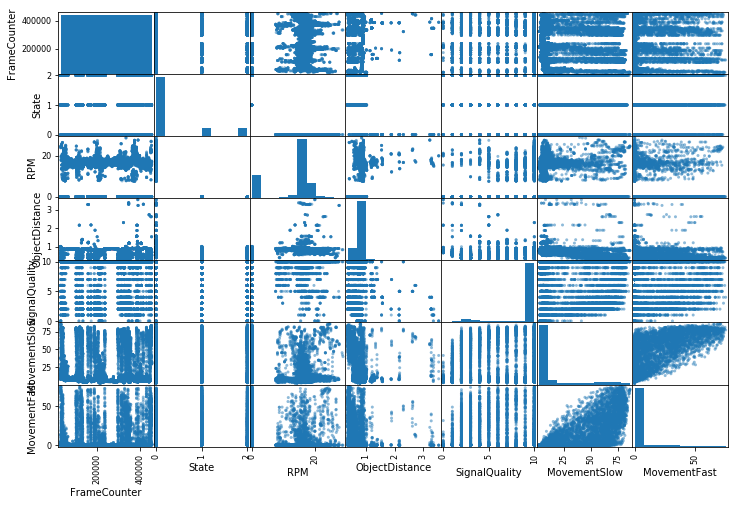

In [12]:
from pandas.plotting import scatter_matrix

scatter_matrix(data, figsize=(12, 8))
plt.show

We can clearly, MovmentFast and MovementSlow have somewhat correlation and sate has distributed corelation so using state will not effective for the predictions

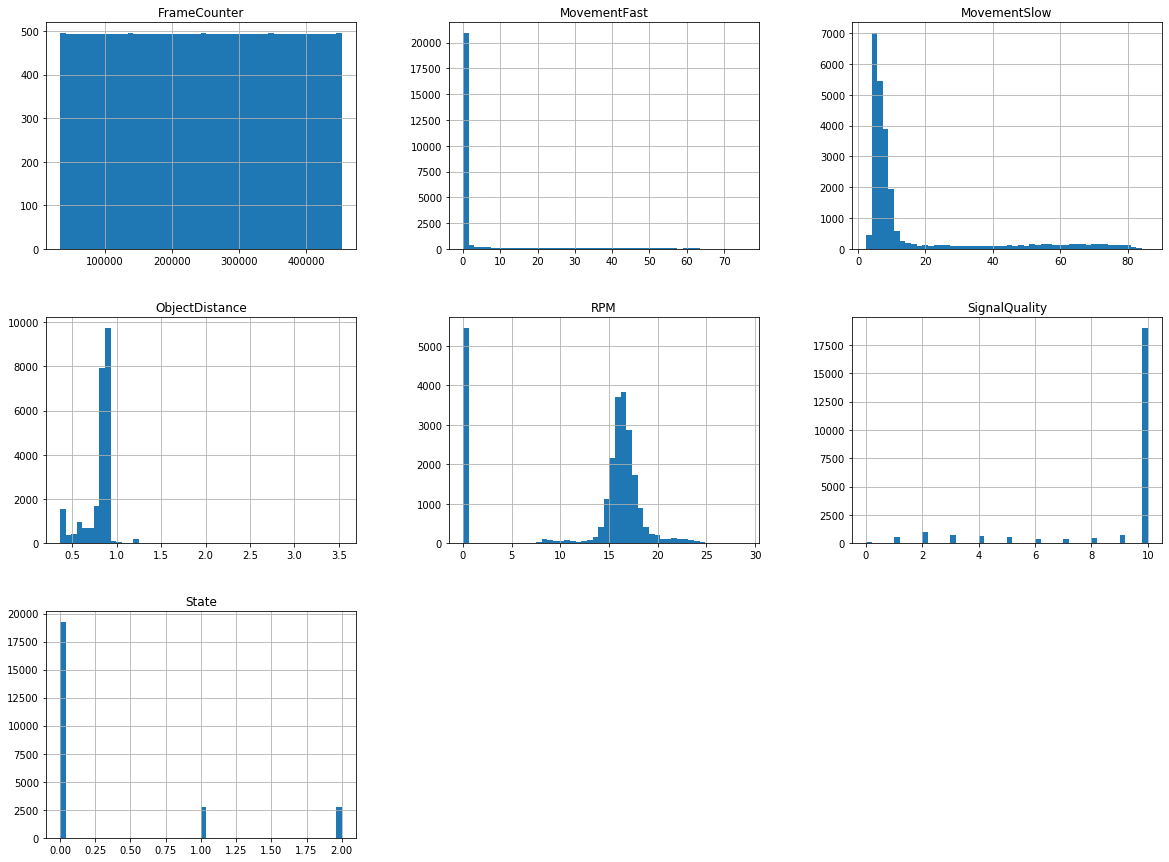

In [13]:
data.hist(bins=50, figsize=(20,15))
plt.show()

##### According to above histogram FrameCounter does not give valuable information for the prediction it is just a counter, So further training tasks

### Remove miliseconds in timestap

In [14]:
data['TimeStamp'] = data['TimeStamp'].str.slice(stop=-10)

In [15]:
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

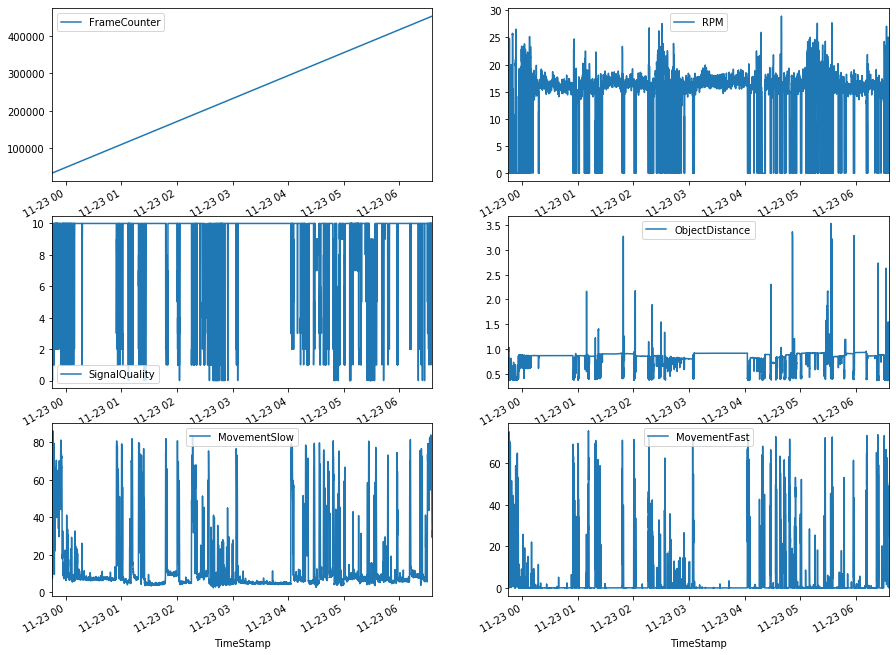

In [16]:
# fig, ax1 = plt.subplots(1,1,figsize=(8,4))
# data.plot(x='TimeStamp',y='State', ax=ax1)
fig, axes = plt.subplots(3,2,figsize=(15, 12))
data.plot(x='TimeStamp',y='FrameCounter', ax=axes[0,0])
data.plot(x='TimeStamp',y='SignalQuality', ax=axes[1,0])
data.plot(x='TimeStamp',y='RPM', ax=axes[0,1])
data.plot(x='TimeStamp',y='ObjectDistance', ax=axes[1,1])
data.plot(x='TimeStamp',y='MovementSlow', ax=axes[2,0])
data.plot(x='TimeStamp',y='MovementFast', ax=axes[2,1])
plt.show()

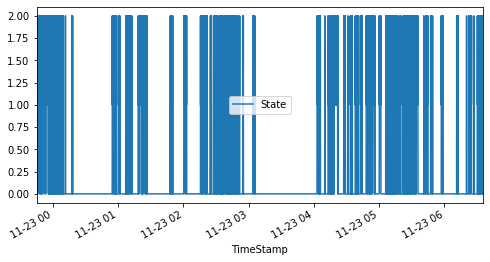

In [17]:
fig, ax1 = plt.subplots(1,1,figsize=(8,4))
data.plot(x='TimeStamp',y='State', ax=ax1)
plt.show()

In [18]:
# pd.to_datetime(data['TimeStamp'], format='%d%b%Y:%H:%M:%S.%f')
data['Date'] = [d.date() for d in data['TimeStamp']]
data['Time'] = [d.time() for d in data['TimeStamp']]

In [19]:
mid = data['Date']
data.drop("Date", axis=1,inplace = True)
data.insert(0, 'Date', mid)

mid = data['Time']
data.drop("Time", axis=1,inplace = True)
data.insert(1, 'Time', mid)

data.drop("TimeStamp", axis=1, inplace=True)

In [20]:
data

,Date,Time,FrameCounter,State,RPM,ObjectDistance,SignalQuality,MovementSlow,MovementFast
0,2017-11-22,23:45:00,32734,1,0.0000,0.989470,4,14.26930,0.055457
1,2017-11-22,23:45:01,32751,1,0.0000,0.987036,4,12.20640,0.088731
2,2017-11-22,23:45:02,32768,1,0.0000,1.008620,7,10.84580,1.696980
3,2017-11-22,23:45:03,32785,2,0.0000,0.976657,0,11.29010,2.628660
4,2017-11-22,23:45:04,32802,1,0.0000,0.958549,0,13.42030,3.826530
5,2017-11-22,23:45:05,32819,1,0.0000,1.021660,5,16.41150,3.981810
6,2017-11-22,23:45:06,32836,2,0.0000,1.021190,6,18.86310,2.639750
7,2017-11-22,23:45:07,32853,1,0.0000,1.020810,6,20.23170,2.107360
8,2017-11-22,23:45:08,32870,1,0.0000,1.022360,6,21.00920,1.563890
9,2017-11-22,23:45:09,32887,2,0.0000,1.023690,6,21.32260,1.197870


In [21]:
data["State"].value_counts()

0    19241
2     2741
1     2723
Name: State, dtype: int64

In [22]:
# data["RPM"].value_counts(ascending=True)

In [23]:
# data["ObjectDistance"].value_counts()

In [24]:
data["SignalQuality"].value_counts()

10    19018
2      1037
3       735
9       702
4       640
1       583
5       553
8       514
7       419
6       399
0       105
Name: SignalQuality, dtype: int64

In [25]:
# data["MovementSlow"].value_counts()

# Labels

In [26]:
labels = pd.read_csv("labels.csv",sep=',')

In [27]:
labels.describe()

,Start Time: 22.11.2017 23:45:00
count,821
unique,5
top,000; 3
freq,270


In [28]:
labels.head()

,Start Time: 22.11.2017 23:45:00
23:45:00,000; 0
23:45:30,000; 0
23:46:00,000; 0
23:46:30,000; 0
23:47:00,000; 0


In [29]:
labels.tail()

,Start Time: 22.11.2017 23:45:00
06:33:00,000; 0
06:33:30,000; 0
06:34:00,000; 0
06:34:30,000; 0
06:35:00,000; 2


Labels has only one colum

In [30]:
print(len(labels.columns))
labels.columns

1


Index(['Start Time: 22.11.2017 23:45:00'], dtype='object')

In [31]:
# labels['Start Time: 22.11.2017 23:45:00'].hist(bins=50)
# plt.show()

In [32]:
# labels['TimeStamp'] = labels['Start Time: 22.11.2017 23:45:00'].str.slice(stop=-4)
labels.iloc[-1:]

,Start Time: 22.11.2017 23:45:00
06:35:00,000; 2


In [33]:
labels.dtypes

Start Time: 22.11.2017 23:45:00    object
dtype: object

In [34]:
labels = labels.reset_index()
labels["TimeStamp"] = labels["index"]
labels = labels.drop("index", axis=1)
mid = labels['TimeStamp']
labels.drop(labels=['TimeStamp'], axis=1,inplace = True)
labels.insert(0, 'TimeStamp', mid)

In [35]:
labels["Label"] = labels["Start Time: 22.11.2017 23:45:00"].str.slice(start=-1)

In [36]:
labels = labels.drop("Start Time: 22.11.2017 23:45:00", axis=1)

In [37]:
# labels['TimeStamp'] = [d.time() for d in labels['TimeStamp']]
ad = pd.to_datetime(labels['TimeStamp'])
labels['TimeStamp'] = ad.dt.strftime('%H:%M:%S')


In [38]:
labels.describe()

,TimeStamp,Label
count,821,821
unique,821,5
top,03:58:00,3
freq,1,270


In [39]:
# labels["TimeStamp"].iloc[0]

In [40]:
data.head()

,Date,Time,FrameCounter,State,RPM,ObjectDistance,SignalQuality,MovementSlow,MovementFast
0,2017-11-22,23:45:00,32734,1,0.0,0.989470,4,14.2693,0.055457
1,2017-11-22,23:45:01,32751,1,0.0,0.987036,4,12.2064,0.088731
2,2017-11-22,23:45:02,32768,1,0.0,1.008620,7,10.8458,1.696980
3,2017-11-22,23:45:03,32785,2,0.0,0.976657,0,11.2901,2.628660
4,2017-11-22,23:45:04,32802,1,0.0,0.958549,0,13.4203,3.826530


In [41]:
data.tail()

,Date,Time,FrameCounter,State,RPM,ObjectDistance,SignalQuality,MovementSlow,MovementFast
24700,2017-11-23,06:35:25,452634,0,16.5326,0.711621,10,29.1574,0.587844
24701,2017-11-23,06:35:26,452651,0,16.1115,0.713980,10,29.3478,0.754215
24702,2017-11-23,06:35:27,452668,0,15.9265,0.718161,10,29.7009,1.685890
24703,2017-11-23,06:35:28,452685,0,15.5886,0.722880,10,30.6569,1.818990
24704,2017-11-23,06:35:29,452702,0,15.5886,0.722880,10,32.6087,1.885540


### There is a missing in 30 pattern in data file

In [42]:
data["Time"].iloc[::30]

0        23:45:00
30       23:45:30
60       23:46:00
90       23:46:30
120      23:47:00
150      23:47:30
180      23:48:00
210      23:48:30
240      23:49:00
270      23:49:30
300      23:49:59
330      23:50:29
360      23:50:59
390      23:51:29
420      23:51:59
450      23:52:29
480      23:52:59
510      23:53:29
540      23:53:59
570      23:54:29
600      23:54:59
630      23:55:28
660      23:55:58
690      23:56:28
720      23:56:58
750      23:57:28
780      23:57:58
810      23:58:28
840      23:58:58
870      23:59:28
           ...   
23820    06:20:48
23850    06:21:18
23880    06:21:48
23910    06:22:17
23940    06:22:47
23970    06:23:17
24000    06:23:47
24030    06:24:17
24060    06:24:47
24090    06:25:17
24120    06:25:47
24150    06:26:17
24180    06:26:47
24210    06:27:17
24240    06:27:46
24270    06:28:16
24300    06:28:46
24330    06:29:16
24360    06:29:46
24390    06:30:16
24420    06:30:46
24450    06:31:16
24480    06:31:46
24510    06:32:16
24540    0

# Data Preparation

Below function returns the all 00 and 30 second times in the data file

In [43]:
data

,Date,Time,FrameCounter,State,RPM,ObjectDistance,SignalQuality,MovementSlow,MovementFast
0,2017-11-22,23:45:00,32734,1,0.0000,0.989470,4,14.26930,0.055457
1,2017-11-22,23:45:01,32751,1,0.0000,0.987036,4,12.20640,0.088731
2,2017-11-22,23:45:02,32768,1,0.0000,1.008620,7,10.84580,1.696980
3,2017-11-22,23:45:03,32785,2,0.0000,0.976657,0,11.29010,2.628660
4,2017-11-22,23:45:04,32802,1,0.0000,0.958549,0,13.42030,3.826530
5,2017-11-22,23:45:05,32819,1,0.0000,1.021660,5,16.41150,3.981810
6,2017-11-22,23:45:06,32836,2,0.0000,1.021190,6,18.86310,2.639750
7,2017-11-22,23:45:07,32853,1,0.0000,1.020810,6,20.23170,2.107360
8,2017-11-22,23:45:08,32870,1,0.0000,1.022360,6,21.00920,1.563890
9,2017-11-22,23:45:09,32887,2,0.0000,1.023690,6,21.32260,1.197870


In [44]:
labels

,TimeStamp,Label
0,23:45:00,0
1,23:45:30,0
2,23:46:00,0
3,23:46:30,0
4,23:47:00,0
5,23:47:30,0
6,23:48:00,0
7,23:48:30,0
8,23:49:00,0
9,23:49:30,1


In [45]:
j=0
k=0

begins = []

for i in range(len(data)):
    a = data["Time"].iloc[i]

    if (a.second==0 or a.second==30):
#         print(i-k, i)
        begins.append(i)
        j+=1
        k = i
print(j)
print(begins)

824
[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 301, 331, 361, 391, 421, 451, 481, 511, 541, 571, 601, 632, 662, 692, 722, 752, 782, 812, 842, 872, 902, 932, 963, 993, 1023, 1053, 1083, 1113, 1143, 1173, 1203, 1233, 1263, 1294, 1324, 1354, 1384, 1414, 1444, 1474, 1504, 1534, 1564, 1594, 1625, 1655, 1685, 1715, 1745, 1775, 1805, 1835, 1865, 1895, 1926, 1956, 1986, 2016, 2046, 2076, 2106, 2136, 2166, 2196, 2226, 2257, 2287, 2317, 2347, 2377, 2407, 2437, 2467, 2497, 2527, 2557, 2588, 2618, 2648, 2678, 2708, 2738, 2768, 2798, 2828, 2858, 2888, 2919, 2949, 2979, 3009, 3039, 3069, 3099, 3129, 3159, 3189, 3219, 3250, 3280, 3310, 3340, 3370, 3400, 3430, 3460, 3490, 3520, 3550, 3581, 3611, 3641, 3671, 3701, 3731, 3761, 3791, 3821, 3851, 3881, 3912, 3942, 3972, 4002, 4032, 4062, 4092, 4122, 4152, 4182, 4212, 4243, 4273, 4303, 4333, 4363, 4393, 4423, 4453, 4483, 4513, 4544, 4574, 4604, 4634, 4664, 4694, 4724, 4754, 4784, 4814, 4844, 4875, 4905, 4935, 4965, 4995, 5025, 5055, 5085, 5115, 5145, 51

In [46]:
len(data)

24705

In [47]:
data1 = data.drop("Time", axis=1)
data1 = data1.drop("Date", axis=1)
data1 = data1.drop("FrameCounter", axis=1)
data1 = data1.drop("State", axis=1)

data_time = data.filter(["Time", "Date"], axis=1)

In [48]:
data_time.head()

,Time,Date
0,23:45:00,2017-11-22
1,23:45:01,2017-11-22
2,23:45:02,2017-11-22
3,23:45:03,2017-11-22
4,23:45:04,2017-11-22


In [49]:
data1.head()

,RPM,ObjectDistance,SignalQuality,MovementSlow,MovementFast
0,0.0,0.989470,4,14.2693,0.055457
1,0.0,0.987036,4,12.2064,0.088731
2,0.0,1.008620,7,10.8458,1.696980
3,0.0,0.976657,0,11.2901,2.628660
4,0.0,0.958549,0,13.4203,3.826530


In [50]:
i = 1
# time1 = str(data_time["Time"].iloc[begins[i]])
time = str(data_time["Time"].iloc[begins[i]])
date = str(data_time["Date"].iloc[begins[i]])
features = np.array(data1.iloc[begins[i]: begins[i+1]])
label = labels["Label"].loc[labels['TimeStamp'] == str(data_time["Time"].iloc[begins[i]])].values[0]
labels["TimeStamp"].loc[labels['TimeStamp'] == str(data_time["Time"].iloc[begins[i]])].values[0]

'23:45:30'

In [51]:
print(time, date, label)

23:45:30 2017-11-22 0


In [52]:
dataFrame = []
for i in range(len(begins)-1):
    row = []
    time = str(data_time["Time"].iloc[begins[i]])
    date = str(data_time["Date"].iloc[begins[i]])
    features = np.array(data1.iloc[begins[i]: begins[i+1]])
    label = labels["Label"].loc[labels['TimeStamp'] == str(data_time["Time"].iloc[begins[i]])].values[0]
    startTime = labels["TimeStamp"].loc[labels['TimeStamp'] == str(data_time["Time"].iloc[begins[i]])].values[0]
    endTime = labels["TimeStamp"].loc[labels['TimeStamp'] == str(data_time["Time"].iloc[begins[i+1]])].values[0]
    row.append(date)
#     row.append(time)
    row.append(startTime)
    row.append(endTime)
    row.append(features)
    row.append(label)
    dataFrame.append(row)
#     print(date, time, features, label)

In [53]:
avgFrame = []
for i in range(len(begins)-1):
    row = []
    time = str(data_time["Time"].iloc[begins[i]])
    date = str(data_time["Date"].iloc[begins[i]])
    features = (data1.iloc[begins[i]: begins[i+1]]).mean().to_frame().transpose().values[0]
    label = labels["Label"].loc[labels['TimeStamp'] == str(data_time["Time"].iloc[begins[i]])].values[0]
    startTime = labels["TimeStamp"].loc[labels['TimeStamp'] == str(data_time["Time"].iloc[begins[i]])].values[0]
    endTime = labels["TimeStamp"].loc[labels['TimeStamp'] == str(data_time["Time"].iloc[begins[i+1]])].values[0]
    row.append(date)
#     row.append(time)
    row.append(startTime)
    row.append(endTime)
    row.extend(features)
    row.append(label)
    avgFrame.append(row)
#     print(date, time, features, label)

In [54]:
f = (data1.iloc[begins[i]: begins[i+1]]).mean()

In [55]:
avgFrame[0]

['2017-11-22',
 '23:45:00',
 '23:45:30',
 0.0,
 1.0050128000000003,
 4.233333333333333,
 17.183041999999997,
 1.03297862,
 '0']

In [56]:
c = data1.iloc[begins[2]: begins[3]]

In [57]:
c.mean().to_frame().transpose()

,RPM,ObjectDistance,SignalQuality,MovementSlow,MovementFast
0,8.11255,0.552008,8.4,66.79864,29.113056


In [58]:
# for i in range(len(labels)):
#     print(labels["TimeStamp"].iloc[i])
#     date_time
#     labels["Label"].loc[labels['TimeStamp'] == str(data_time["Time"].iloc[begins[i]])

In [59]:
k = []
for i in range(len(begins)-1):
    ef = k.append(labels.loc[labels['TimeStamp'] == str(data_time["Time"].iloc[begins[i]])])

In [60]:
len(k)

823

In [61]:
# k=0
# for i in labels["TimeStamp"]:
#     if labels["TimeStamp"].iloc[0] not in df["StartTime"].values:
#         print("d")
#     k+=1
# print(k)

In [62]:
# k =0
# for i in labels["TimeStamp"]:
#     print(i)
#     k+=1
# print(k)

# if df["StartTime"].iloc[0] in labels["TimeStamp"].values:
#     print("d")

In [63]:
# df["StartTime"].values

In [64]:
# df["StartTime"].iloc[0] == labels["TimeStamp"].iloc[0]

In [65]:
# len(labels["TimeStamp"])
# len(df["StartTime"])

In [66]:
# for i in df["StartTime"].values:
#     if i not in labels["TimeStamp"].values:
#         print(i)

In [67]:
# def Repeat(x): 
#     _size = len(x) 
#     repeated = [] 
#     for i in range(_size): 
#         k = i + 1
#         for j in range(k, _size): 
#             if x[i] == x[j] and x[i] not in repeated: 
#                 repeated.append(x[i]) 
#     return repeated 

In [68]:
# a = Repeat(df["StartTime"].values)
# a

In [69]:
# for i in a:
#     count=0
#     for j in df["StartTime"].values:
#         if i==j:
#             count +=1
#     if count >= 2:
#         print(i, count)

In [70]:
str(data_time["Time"])

'0        23:45:00\n1        23:45:01\n2        23:45:02\n3        23:45:03\n4        23:45:04\n5        23:45:05\n6        23:45:06\n7        23:45:07\n8        23:45:08\n9        23:45:09\n10       23:45:10\n11       23:45:11\n12       23:45:12\n13       23:45:13\n14       23:45:14\n15       23:45:15\n16       23:45:16\n17       23:45:17\n18       23:45:18\n19       23:45:19\n20       23:45:20\n21       23:45:21\n22       23:45:22\n23       23:45:23\n24       23:45:24\n25       23:45:25\n26       23:45:26\n27       23:45:27\n28       23:45:28\n29       23:45:29\n           ...   \n24675    06:35:00\n24676    06:35:01\n24677    06:35:02\n24678    06:35:03\n24679    06:35:04\n24680    06:35:05\n24681    06:35:06\n24682    06:35:07\n24683    06:35:08\n24684    06:35:09\n24685    06:35:10\n24686    06:35:11\n24687    06:35:12\n24688    06:35:13\n24689    06:35:14\n24690    06:35:15\n24691    06:35:16\n24692    06:35:17\n24693    06:35:18\n24694    06:35:19\n24695    06:35:20\n24696    06

In [71]:
labels.loc[data_time["Time"] == "01:55:00"]

,TimeStamp,Label


In [72]:
labels.loc[labels["TimeStamp"]  == "04:27:30"]

,TimeStamp,Label
565,04:27:30,2


In [73]:
labels.loc[labels["TimeStamp"] == "06:11:00"]

,TimeStamp,Label
772,06:11:00,2


In [74]:
# loc[df["StartTime"] == "06:11:00"]

In [75]:
df = pd.DataFrame(dataFrame, columns=["Date", "StartTime", "EndTime", "Features", "Label"])

In [76]:
df_ = pd.DataFrame(avgFrame, columns=["Date", "StartTime", "EndTime", "RPM", "ObjectDistance", "SignalQuality", "MovementSlow", "MovementFast", "Label"])

In [77]:
df_

,Date,StartTime,EndTime,RPM,ObjectDistance,SignalQuality,MovementSlow,MovementFast,Label
0,2017-11-22,23:45:00,23:45:30,0.000000,1.005013,4.233333,17.183042,1.032979,0
1,2017-11-22,23:45:30,23:46:00,0.000000,0.718234,5.433333,39.918807,38.216497,0
2,2017-11-22,23:46:00,23:46:30,8.112550,0.552008,8.400000,66.798640,29.113056,0
3,2017-11-22,23:46:30,23:47:00,0.000000,0.547259,4.900000,39.094203,23.586217,0
4,2017-11-22,23:47:00,23:47:30,0.000000,0.410558,9.366667,71.531260,35.720941,0
5,2017-11-22,23:47:30,23:48:00,8.712047,0.662848,6.966667,30.039272,9.052053,0
6,2017-11-22,23:48:00,23:48:30,0.000000,0.531057,5.266667,40.621237,19.096058,0
7,2017-11-22,23:48:30,23:49:00,1.828120,0.474209,5.500000,58.928643,26.071059,0
8,2017-11-22,23:49:00,23:49:30,8.120300,0.548221,9.266667,60.000520,21.033347,0
9,2017-11-22,23:49:30,23:50:00,11.045110,0.545825,8.612903,66.712442,30.122429,1


# Training Models

In [78]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score #For testing Accuracy
from sklearn.metrics import confusion_matrix

In [79]:
X = df_.filter(["RPM", "ObjectDistance", "SignalQuality", "MovementSlow", "MovementFast"], axis=1)
y = df_["Label"]

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(X)

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=0.2, random_state=42)

In [195]:
from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
# Linear Regression
from sklearn.linear_model import SGDClassifier

lin_clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
lin_clf.fit(X_train, y_train)
lin_pred = lin_clf.predict(X_test)
lin_acore = accuracy_score(y_test, lin_pred)
# lin_acore #Accuracy For after hiperparameter is changed
print('Accuracy = {:.2f} %'.format(lin_acore*100))

Accuracy = 38.18 %


C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


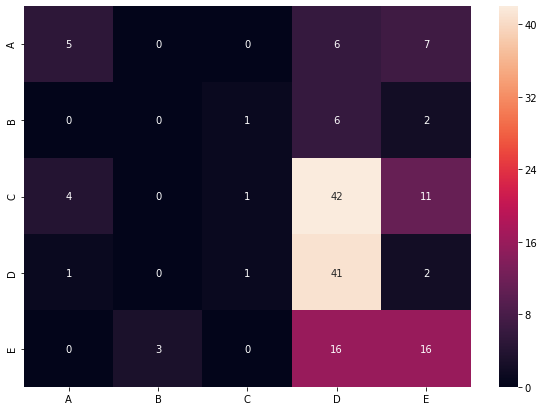

In [128]:
q = confusion_matrix(y_test, lin_pred)
df_cm = pd.DataFrame(q, index = [i for i in "ABCDE"],
                  columns = [i for i in "ABCDE"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [85]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

forest_reg = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# # scores = cross_val_score(forest_reg, X_train, y_train.values.ravel(), scoring="neg_mean_squared_error", cv=10)
# rdf_scores = np.sqrt(-scores)
# display_scores(rdf_scores)

forest_reg.fit(X_train, y_train)
rf_predict = forest_reg.predict(X_test)

In [86]:
rf_acore = accuracy_score(y_test, rf_predict)
print('Accuracy = {:.2f} %'.format(rf_acore*100))
# rf_acore #Accuracy For after hiperparameter is changed

Accuracy = 61.21 %


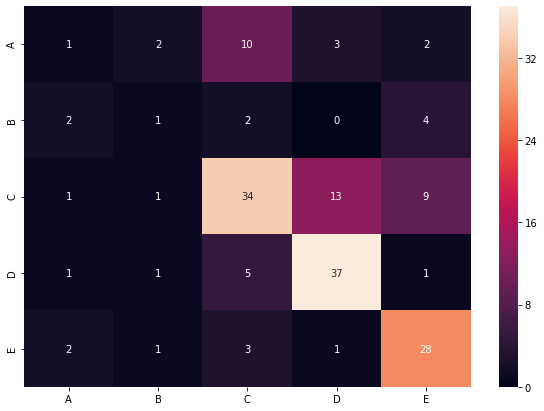

In [129]:
q = confusion_matrix(y_test, rf_predict)
df_cm = pd.DataFrame(q, index = [i for i in "ABCDE"],
                  columns = [i for i in "ABCDE"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [88]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [1, 2, 3]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestClassifier()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train.values.ravel())
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [89]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [90]:
##########Training SVC########
from sklearn.svm import SVC

In [91]:
svc_clf = SVC()
svc_clf.fit(X_train, y_train)
svc_clf_predict = svc_clf.predict(X_test)
svc_clf_acore_1 = accuracy_score(y_test, svc_clf_predict)
svc_clf_acore_1 #Accuracy For without setting any hiperparameter manually
print('Accuracy = {:.2f} %'.format(svc_clf_acore_1*100))

Accuracy = 43.03 %


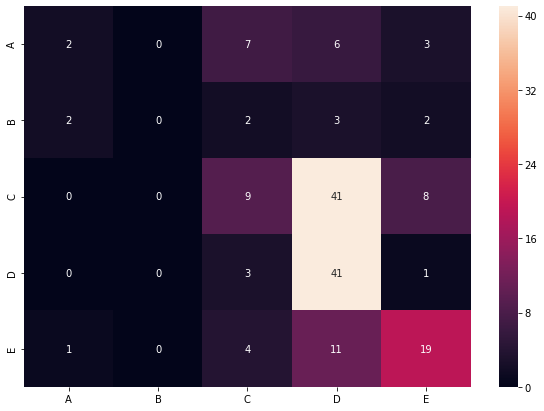

In [130]:
#Confusion Metrix
q = confusion_matrix(y_test, svc_clf_predict)
df_cm = pd.DataFrame(q, index = [i for i in "ABCDE"],
                  columns = [i for i in "ABCDE"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [93]:
#Changing the Hiperparameters
svc_clf_1 = SVC(gamma='scale')
svc_clf_1.fit(X_train, y_train)
svc_clf_predict = svc_clf_1.predict(X_test)
svc_clf_acore = accuracy_score(y_test, svc_clf_predict)
svc_clf_acore #Accuracy For after hiperparameter is changed
print('Accuracy = {:.2f} %'.format(svc_clf_acore*100))

Accuracy = 43.03 %


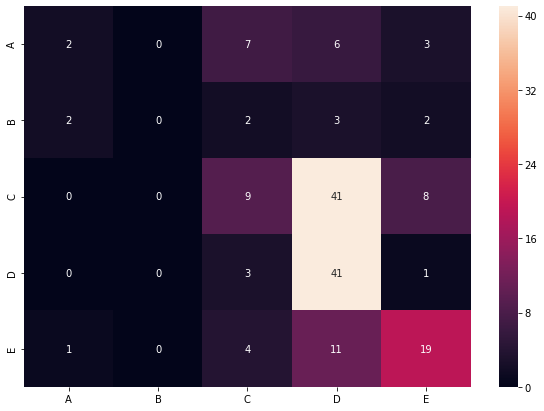

In [131]:
q = confusion_matrix(y_test, svc_clf_predict)
df_cm = pd.DataFrame(q, index = [i for i in "ABCDE"],
                  columns = [i for i in "ABCDE"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [95]:
#Accuracy For with polykernel 
poly_kernel_svm_clf = SVC(kernel="poly")
poly_kernel_svm_clf.fit(X_train, y_train)
poly_kernel_svm_predict = poly_kernel_svm_clf.predict(X_test)
poly_kernel_svm_score = accuracy_score(y_test, poly_kernel_svm_predict)
poly_kernel_svm_score
print('Accuracy = {:.2f} %'.format(poly_kernel_svm_score*100))

Accuracy = 35.15 %


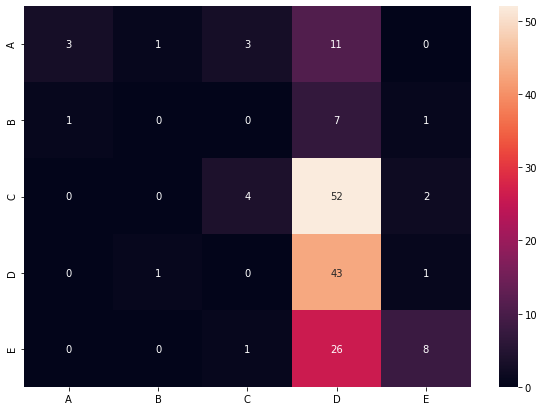

In [132]:
q = confusion_matrix(y_test, poly_kernel_svm_predict)
df_cm = pd.DataFrame(q, index = [i for i in "ABCDE"],
                  columns = [i for i in "ABCDE"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [97]:
#Accuracy For with polykernel with hiperparameter set
poly_kernel_svm_clf = SVC(kernel="poly", gamma='scale')
poly_kernel_svm_clf.fit(X_train, y_train)
poly_kernel_svm_predict = poly_kernel_svm_clf.predict(X_test)
poly_kernel_svm_score = accuracy_score(y_test, poly_kernel_svm_predict)
poly_kernel_svm_score
print('Accuracy = {:.2f} %'.format(poly_kernel_svm_score*100))

Accuracy = 35.15 %


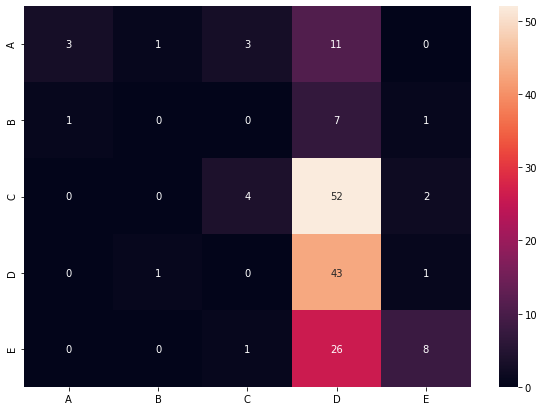

In [136]:
q = confusion_matrix(y_test, poly_kernel_svm_predict)
df_cm = pd.DataFrame(q, index = [i for i in "ABCDE"],
                  columns = [i for i in "ABCDE"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

# Neural Netwoks

In [99]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling1D, Conv1D
from keras import layers

Using TensorFlow backend.


In [100]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
Y = encoder.fit_transform(y_train)

In [101]:
Y

array([[0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]])

In [102]:
Y_test = encoder.fit_transform(y_test)

In [103]:
Y_test[:11]

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [104]:
# model = Sequential()
# model.add(Conv1D(12, 2, input_dim=5, activation="relu"))
# # model.add(Dense(15, activation="relu"))
# # model.add(Dense(8, activation="sigmoid"))
# # model.add(Dense(10, activation="relu"))
# # model.add(Dense(1, activation="sigmoid"))
# # model.add(MaxPooling2D(pool_size=(2,1)))

n_timesteps = 5
n_features = 1
n_outputs = 5
model = Sequential()
# model.add(Dense(12, input_))
# model.add(Conv1D(12, 2, input_dim=5, activation="relu"))
# model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_dim=5))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling1D(2))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# model.add(Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(10, activation='softmax'))
# model.add(Dense(100))
# model.add(Dropout(0.5))
# model.add(Dense(10))
# model.add(Activation('softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [105]:
model = Sequential()
model.add(Dense(5, input_dim = 5, activation="relu"))
# model.add(Flatten())
model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='softmax'))
# model.add(Flatten())
model.add(Dense(5, activation="sigmoid"))
model.add(Dropout(0.5))
model.add(Dense(5))

In [106]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [107]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_4 (Dense)              (None, 15)                90        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 128       
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 45        
_________________________________________________________________
dropout_2 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 30        
Total params: 323
Trainable params: 323
Non-trainable params: 0
________________________________________________________

In [108]:
history = model.fit(X_train, Y, epochs=100, validation_data = (X_test,Y_test), batch_size=10)

Instructions for updating:
Use tf.cast instead.
Train on 658 samples, validate on 165 samples
Epoch 1/100
658/658 [==============================] - 0s 508us/step - loss: 2.0408 - accuracy: 0.4875 - val_loss: 1.1767 - val_accuracy: 0.6109
Epoch 2/100
658/658 [==============================] - 0s 108us/step - loss: 1.9197 - accuracy: 0.4985 - val_loss: 1.1784 - val_accuracy: 0.6109
Epoch 3/100
658/658 [==============================] - 0s 106us/step - loss: 1.8153 - accuracy: 0.5106 - val_loss: 1.1843 - val_accuracy: 0.6109
Epoch 4/100
658/658 [==============================] - 0s 106us/step - loss: 1.7742 - accuracy: 0.5216 - val_loss: 1.1917 - val_accuracy: 0.6109
Epoch 5/100
658/658 [==============================] - 0s 100us/step - loss: 1.8225 - accuracy: 0.5301 - val_loss: 1.4656 - val_accuracy: 0.6109
Epoch 6/100
658/658 [==============================] - 0s 108us/step - loss: 1.6859 - accuracy: 0.5304 - val_loss: 1.4641 - val_accuracy: 0.6109
Epoch 7/100
658/658 [===============

In [109]:
X_train

array([[ 0.70103471,  0.55510867,  0.61111284, -0.60042079, -0.40625431],
       [ 0.79225459,  0.14613968,  0.61111284, -0.5004998 , -0.40625431],
       [ 0.36169889,  0.71615331,  0.61111284, -0.52952449, -0.40446676],
       ...,
       [ 0.69402712,  0.52794292,  0.61111284, -0.34811675, -0.40289371],
       [ 0.62895426,  0.60472561,  0.61111284, -0.60765238, -0.40625431],
       [ 0.56107715,  0.27199299,  0.61111284, -0.4761541 , -0.40460976]])

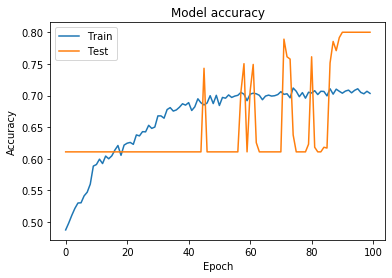

In [111]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

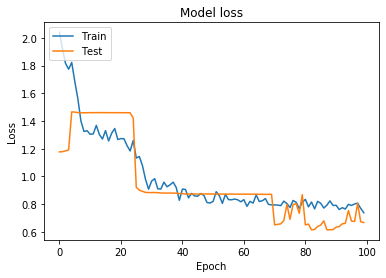

In [112]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [113]:
NN_pred = model.predict(X_test)

In [114]:
pred = list()
for i in range(len(NN_pred)):
    pred.append(str(np.argmax(NN_pred[i])))

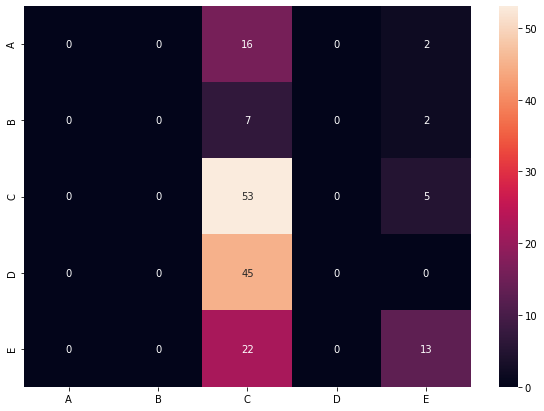

In [134]:
q = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(q, index = [i for i in "ABCDE"],
                  columns = [i for i in "ABCDE"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [116]:
NN_score = accuracy_score(y_test, pred)
print('Accuracy = {:.2f} %'.format(NN_score*100))

Accuracy = 33.33 %


##################################################################

In [117]:
model = Sequential()
model.add(Dense(1, input_dim = 5, activation="relu"))
# model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(28, activation='relu'))
model.add(Dense(32, activation='softmax'))
# model.add(Flatten())
model.add(Dense(5, activation="sigmoid"))
model.add(Dropout(0.3))
model.add(Dense(5))


model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

history = model.fit(X_train, Y, epochs=100, validation_data = (X_test,Y_test), batch_size=100)



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 6         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_10 (Dense)             (None, 12)                132       
_________________________________________________________________
dense_11 (Dense)             (None, 14)                182       
_________________________________________________________________
dense_12 (Dense)             (None, 16)                240       
_________________________________________________________________
dense_13 (Dense)             (None, 20)                340       
_________________________________________________________________
dense_14 (Dense)             (None, 28)               

Epoch 45/100
658/658 [==============================] - 0s 18us/step - loss: 1.3335 - accuracy: 0.7505 - val_loss: 0.7766 - val_accuracy: 0.8000
Epoch 46/100
658/658 [==============================] - 0s 21us/step - loss: 1.2899 - accuracy: 0.7529 - val_loss: 0.7762 - val_accuracy: 0.8000
Epoch 47/100
658/658 [==============================] - 0s 20us/step - loss: 1.3565 - accuracy: 0.7571 - val_loss: 0.7762 - val_accuracy: 0.8000
Epoch 48/100
658/658 [==============================] - 0s 20us/step - loss: 1.3022 - accuracy: 0.7517 - val_loss: 0.7758 - val_accuracy: 0.8000
Epoch 49/100
658/658 [==============================] - 0s 20us/step - loss: 1.2679 - accuracy: 0.7444 - val_loss: 0.7752 - val_accuracy: 0.8000
Epoch 50/100
658/658 [==============================] - 0s 18us/step - loss: 1.3435 - accuracy: 0.7505 - val_loss: 0.7742 - val_accuracy: 0.8000
Epoch 51/100
658/658 [==============================] - 0s 20us/step - loss: 1.2689 - accuracy: 0.7498 - val_loss: 0.7731 - val_ac

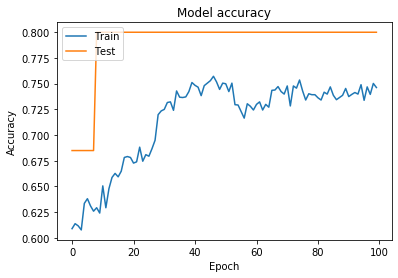

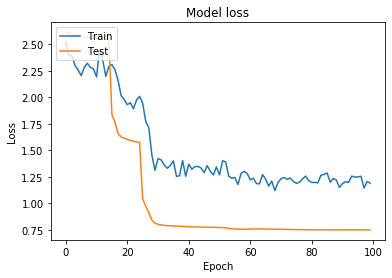

Accuracy = 40.00 %


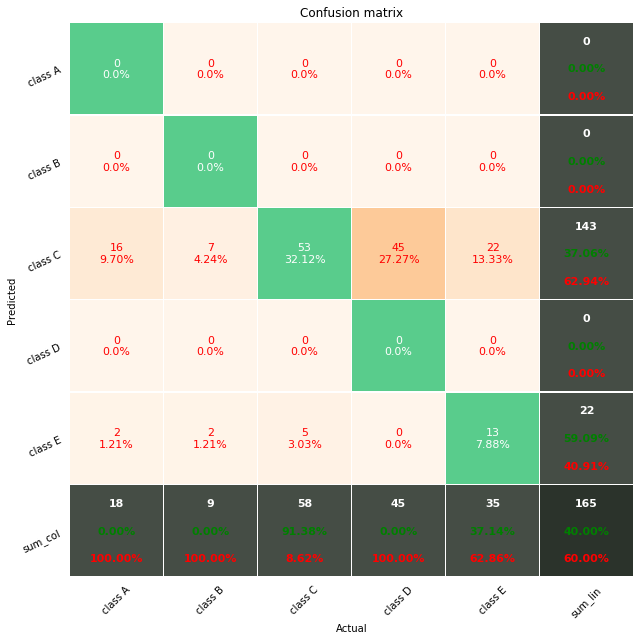

In [207]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

NN_pred = model.predict(X_test)

pred = list()
for i in range(len(NN_pred)):
    pred.append(str(np.argmax(NN_pred[i])))
    
q = confusion_matrix(y_test, pred)
# df_cm = pd.DataFrame(q, index = [i for i in "ABCDE"],
#                   columns = [i for i in "ABCDE"])
# plt.figure(figsize = (10,7))
# sn.heatmap(df_cm, annot=True)

NN_score = accuracy_score(y_test, pred)
print('Accuracy = {:.2f} %'.format(NN_score*100))

plot_confusion_matrix_from_data(y_test, pred)

In [241]:
from sklearn.neural_network import MLPClassifier

# clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
#                     hidden_layer_sizes=(5, 2), random_state=1)
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=13, max_iter= 500, random_state=9)


clf.fit(X_train, y_train)

pred = clf.predict(X_test)

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


C:\Users\PC\Desktop\New_Fiverr\oshanidi\confusion_matrix_pretty_print.py:165: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
C:\Users\PC\Desktop\New_Fiverr\oshanidi\confusion_matrix_pretty_print.py:166: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
C:\Users\PC\Desktop\New_Fiverr\oshanidi\confusion_matrix_pretty_print.py:168: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
C:\Users\PC\Desktop\New_Fiverr\oshanidi\confusion_matrix_pretty_print.py:169: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = Fa

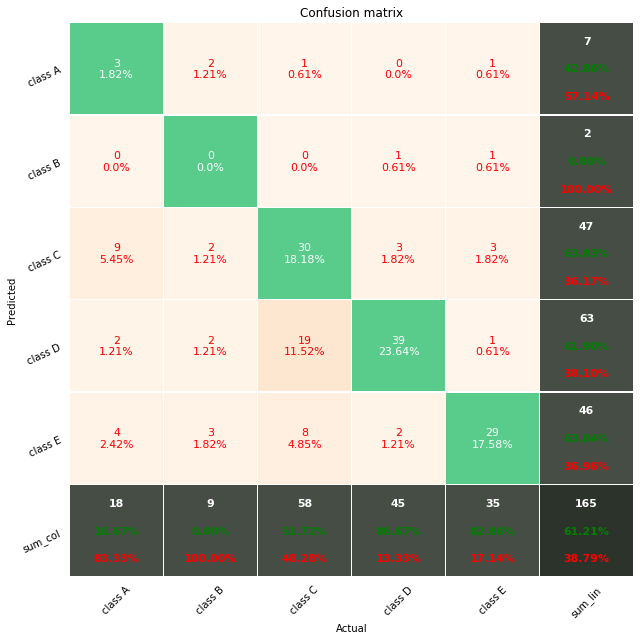

Accuracy = 61.21 %


In [242]:
plot_confusion_matrix_from_data(y_test, pred)
score = accuracy_score(y_test, pred)
print('Accuracy = {:.2f} %'.format(score*100))

In [237]:
param_grid = {'solver': ['lbfgs'], 'max_iter': [100,200,500 ], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1,2,3,4,5,6,7,8,9]}
# solver='lbfgs', alpha=1e-5,
#                     hidden_layer_sizes=(5, 2), random_state=1
clf = GridSearchCV(MLPClassifier(), param_grid, n_jobs=-1)
clf.fit(X_train, y_train.values.ravel())
clf.best_params_

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


{'alpha': 0.0001,
 'hidden_layer_sizes': 13,
 'max_iter': 500,
 'random_state': 9,
 'solver': 'lbfgs'}

In [196]:
clf.best_estimator_

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=12, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=3, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [193]:
10.0 **-np.arange(1, 10)

array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09])